In [69]:
from ctgan import CTGAN

In [63]:
import numpy as np
import pandas as pd

# Definir parámetros
n_samples = 1000

# Variables continuas correlacionadas
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
continuous_data = np.random.multivariate_normal(mean, cov, n_samples)

# Variable discreta correlacionada con las variables continuas
discrete_data = np.random.choice([0, 1, 2, 3, 4], size=(n_samples,), p=[0.3, 0.2, 0.4, 0.07, 0.03])

# Combinar datos en un DataFrame
data = pd.DataFrame(continuous_data, columns=['x', 'y'])
data['Var_Discreta'] = discrete_data

# Visualizar algunas filas de datos
print(data.head())

# Guardar el DataFrame como un archivo CSV
data.to_csv('datos_generados.csv', index=False)

print("Archivo CSV generado exitosamente.")


          x         y  Var_Discreta
0 -0.676109  0.584739             2
1  0.501728  0.003944             1
2  0.402149  0.220929             3
3 -0.268478  0.165272             4
4 -0.228139  0.285843             2
Archivo CSV generado exitosamente.


In [64]:
datos_reales = pd.read_csv('datos_generados.csv')
datos_reales.head()

,x,y,Var_Discreta
0,-0.676109,0.584739,2
1,0.501728,0.003944,1
2,0.402149,0.220929,3
3,-0.268478,0.165272,4
4,-0.228139,0.285843,2


In [65]:
# Names of the columns that are discrete
discrete_columns = [
    'Var_Discreta'
]

ctgan = CTGAN(epochs=3000, verbose=True)
ctgan.fit(datos_reales, discrete_columns)

# Create synthetic data
synthetic_data = ctgan.sample(1000)

Gen. (-1.88) | Discrim. (-0.00): 100%|██████████| 3000/3000 [04:25<00:00, 11.29it/s]


In [66]:
synthetic_data.to_csv('datos_generados_otro.csv', index=False)
synthetic_data.head()

,x,y,Var_Discreta
0,-0.856410,0.777395,0
1,0.660011,-0.753061,2
2,0.649400,-0.511279,2
3,0.317828,0.212803,2
4,0.483716,0.805396,4


---
# Visualización distribuciones

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer los dos archivos CSV
data1 = pd.read_csv('datos_generados.csv')
data2 = pd.read_csv('datos_generados_otro.csv')

In [68]:
from sdmetrics.single_column import KSComplement, TVComplement

for column in data1.columns:
    if column == 'Var_Discreta':
        valor = TVComplement.compute(
        real_data=data1[column],
        synthetic_data=data2[column])
        print(f"Valor TV-Complement {column}: {valor}")
    else:
        valor = KSComplement.compute(
            real_data=data1[column],
            synthetic_data=data2[column])
        print(f"Valor KS-Complement {column}: {valor}")


Valor KS-Complement x: 0.94
Valor KS-Complement y: 0.887
Valor TV-Complement Var_Discreta: 0.773


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import entropy

# Añade una columna de identificación para diferenciar entre datos reales y sintéticos
data1['Tipo'] = 'Real'
data2['Tipo'] = 'Sintético'

# Concatena los datos reales y sintéticos en un solo DataFrame
combined_data = pd.concat([data1, data2], ignore_index=True)

# Plot
g=sns.pairplot(combined_data, hue='Tipo', markers=['o', 's'], palette={'Real': 'blue', 'Sintético': 'orange'}, diag_kind='hist',
                plot_kws=dict(alpha= 0.3))
# Extract legend handles and labels
legend_handles, legend_labels = g._legend_data.values(), g._legend_data.keys()

# Create a legend with a separate color for each category in the discrete variable
discrete_labels = combined_data.iloc[:, -2].unique().tolist()  # Assuming the last column is discrete
for handle, label in zip(legend_handles, legend_labels):
    handle.set_label(label)
    if label == 'Tipo':
        # Add a legend entry for the discrete variable
        for disc_label in discrete_labels:
            g.add_legend(title='Discrete', label=disc_label, color='black', marker='s', alpha=0.7)


plt.show()

def js_divergence(p, q):
    """Calcula la Divergencia Jensen-Shannon entre dos distribuciones de probabilidad."""
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))

jsd_scores = {}
# Prueba numérica - Comparación de distribuciones
for col in data.columns:
    # Histogramas para datos reales y sintéticos
    plt.hist(data[col], alpha=0.5, label='Real')
    plt.hist(synthetic_data[col], alpha=0.5, label='Synthetic')
    plt.title(col)
    plt.legend()
    plt.show()

    jsd_score = js_divergence(data[col], synthetic_data[col])
    jsd_scores[col] = jsd_score

    # Prueba de Kolmogorov-Smirnov
    ks_statistic, p_value = stats.ks_2samp(data[col], synthetic_data[col])
    print(f"KS-Statistic for {col}: {ks_statistic}, p-value: {p_value}")

    # Prueba de Anderson-Darling
    ad_statistic, crit_values, sig_levels = stats.anderson_ksamp([data[col], synthetic_data[col]])
    print(f"AD-Statistic for {col}: {ad_statistic}")

print("################")
    # Mostrar los resultados
for col, score in jsd_scores.items():
    print(f"JSD para la columna '{col}': {score}")

KeyboardInterrupt: 

¿Cuánto divergen las distribuciones?

---

Ahora con el dataset **IRIS**

In [15]:
import pandas as pd
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()

# Crear un DataFrame con los datos
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Añadir la columna de especies (target)
data['species'] = iris.target

# Mapear los números de especies a sus nombres correspondientes
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Guardar el DataFrame como un archivo CSV
data.to_csv('iris_dataset.csv', index=False)

print("Archivo CSV generado exitosamente.")


Archivo CSV generado exitosamente.


In [16]:
datos_reales = pd.read_csv('iris_dataset.csv')
datos_reales.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# Names of the columns that are discrete
discrete_columns = [
    'species'
]

ctgan = CTGAN(epochs=10000, verbose=True)
ctgan.fit(datos_reales, discrete_columns)

# Create synthetic data
synthetic_data = ctgan.sample(150)

Gen. (-0.38) | Discrim. (0.01): 100%|██████████| 10000/10000 [07:39<00:00, 21.75it/s]


In [18]:
synthetic_data.to_csv('datos_generados_otro.csv', index=False)
synthetic_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.102936,3.938867,1.397343,0.389257,setosa
1,5.499629,2.375056,4.344567,1.279850,versicolor
2,5.741884,2.907415,4.868584,1.515195,versicolor
3,6.597662,3.029867,5.303210,2.198445,virginica
4,5.954802,2.706423,4.518100,1.267216,versicolor


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer los dos archivos CSV
data1 = pd.read_csv('iris_dataset.csv')
data2 = pd.read_csv('datos_generados_otro.csv')
# Concatena los datos reales y sintéticos en un solo DataFrame
data1['Dataset'] = 'Real'
data2['Dataset'] = 'Sintético'
combined_data = pd.concat([data1, data2], ignore_index=True)
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
combined_data['species'] = combined_data['species'].map(species_mapping)

In [44]:
combined_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Dataset
0,5.1,3.5,1.4,0.2,0,Real
1,4.9,3.0,1.4,0.2,0,Real
2,4.7,3.2,1.3,0.2,0,Real
3,4.6,3.1,1.5,0.2,0,Real
4,5.0,3.6,1.4,0.2,0,Real


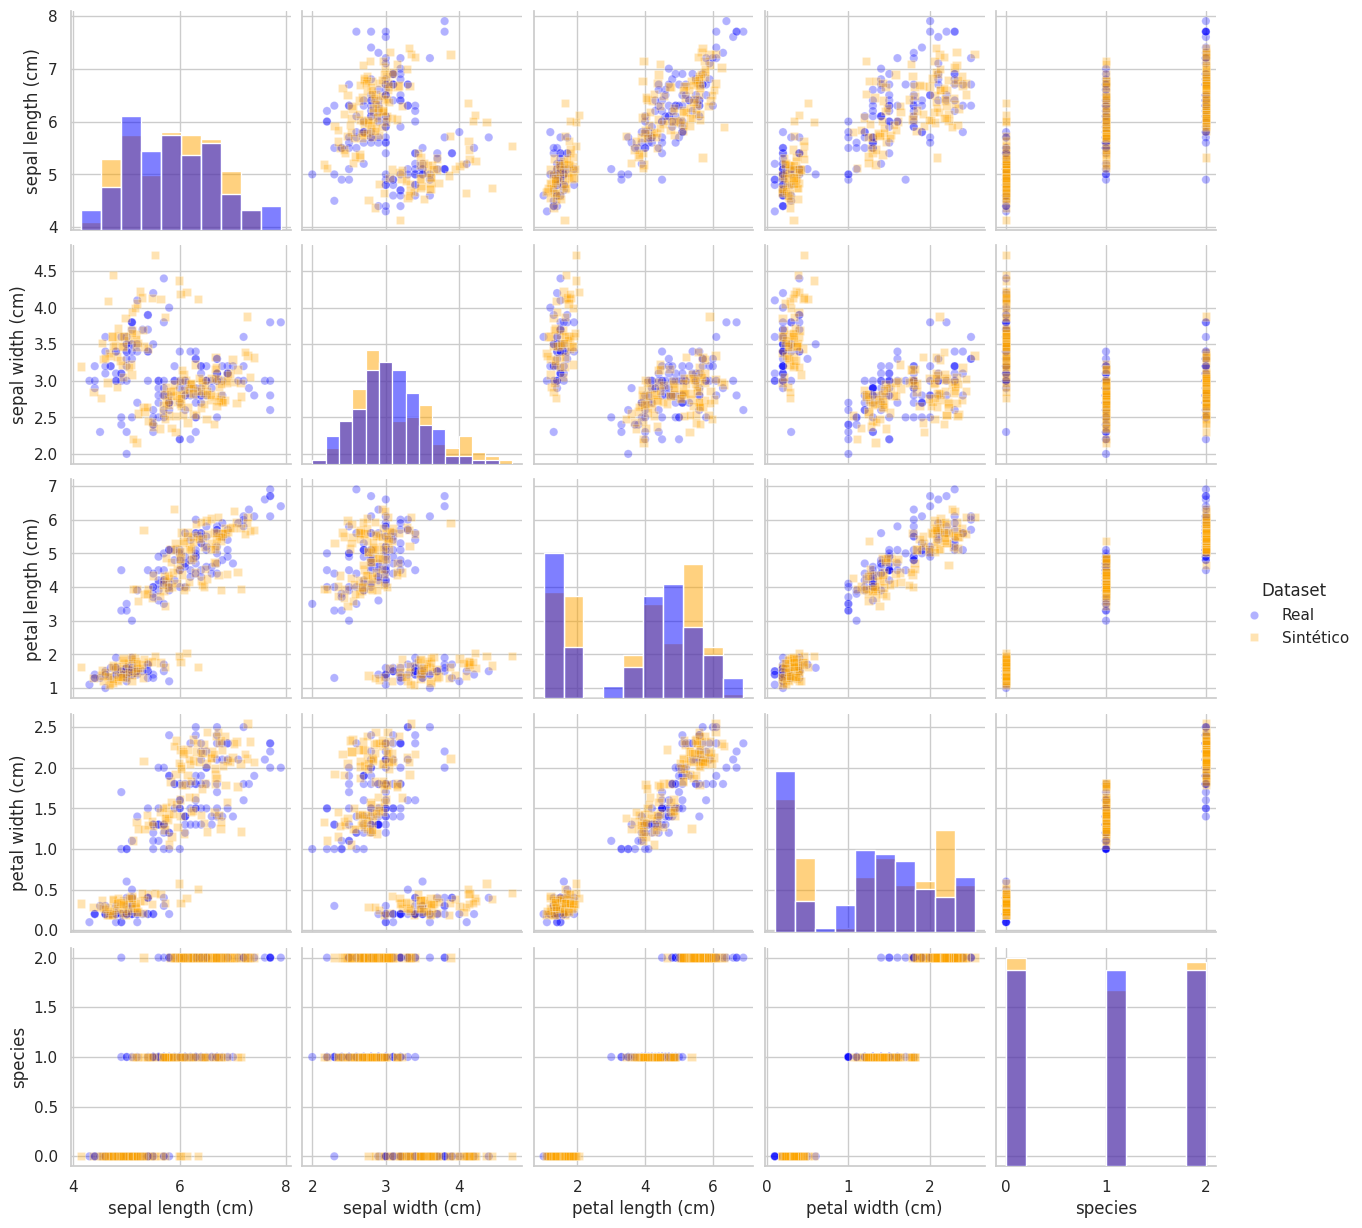

In [45]:


# Plot
sns.pairplot(combined_data, hue='Dataset', markers=['o', 's'], palette={'Real': 'blue', 'Sintético': 'orange'}, diag_kind='hist',
                plot_kws=dict(alpha= 0.3))
plt.show()

In [47]:
from sdmetrics.single_column import KSComplement
KSComplement.compute(
real_data=data1['sepal length (cm)'],
synthetic_data=data2['sepal length (cm)'])

0.9133333333333333

In [56]:
from sdmetrics.single_column import KSComplement, TVComplement

for column in data1.columns:
    if column == 'species':
        valor = TVComplement.compute(
        real_data=data1[column],
        synthetic_data=data2[column])
        print(f"Valor TV-Complement {column}: {valor}")
    elif column == 'Dataset':
        pass
    else:
        valor = KSComplement.compute(
            real_data=data1[column],
            synthetic_data=data2[column])
        print(f"Valor KS-Complement {column}: {valor}")

Valor KS-Complement sepal length (cm): 0.9133333333333333
Valor KS-Complement sepal width (cm): 0.8533333333333333
Valor KS-Complement petal length (cm): 0.8933333333333333
Valor KS-Complement petal width (cm): 0.8
Valor TV-Complement species: 0.9666666666666667


In [53]:
TVComplement.compute(
        real_data=data1['species'],
        synthetic_data=data2['species'])

0.9666666666666667

In [52]:
data1.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'Dataset'],
      dtype='object')

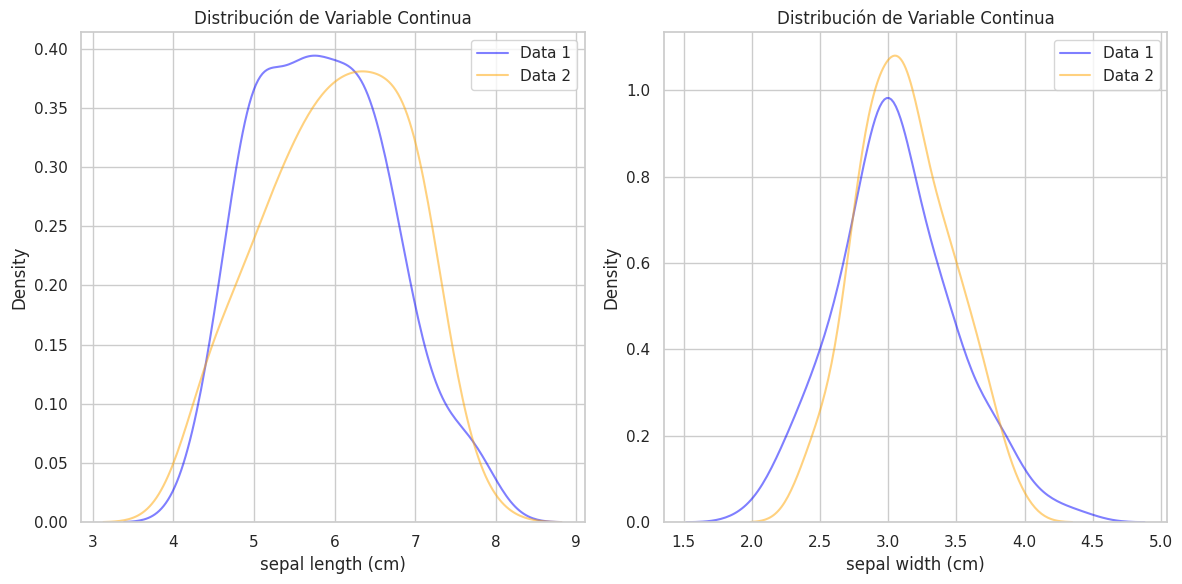

In [39]:


# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear una figura y ejes para los gráficos
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Trazar la distribución de la variable continua
sns.kdeplot(data=data1['sepal length (cm)'], color='blue', alpha=0.5, label='Data 1', ax=axs[0])
sns.kdeplot(data=data2['sepal length (cm)'], color='orange', alpha=0.5, label='Data 2', ax=axs[0])
axs[0].set_title('Distribución de Variable Continua')
axs[0].legend()

sns.kdeplot(data=data1['sepal width (cm)'], color='blue', alpha=0.5, label='Data 1', ax=axs[1])
sns.kdeplot(data=data2['sepal width (cm)'], color='orange', alpha=0.5, label='Data 2', ax=axs[1])
axs[1].set_title('Distribución de Variable Continua')
axs[1].legend()


# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


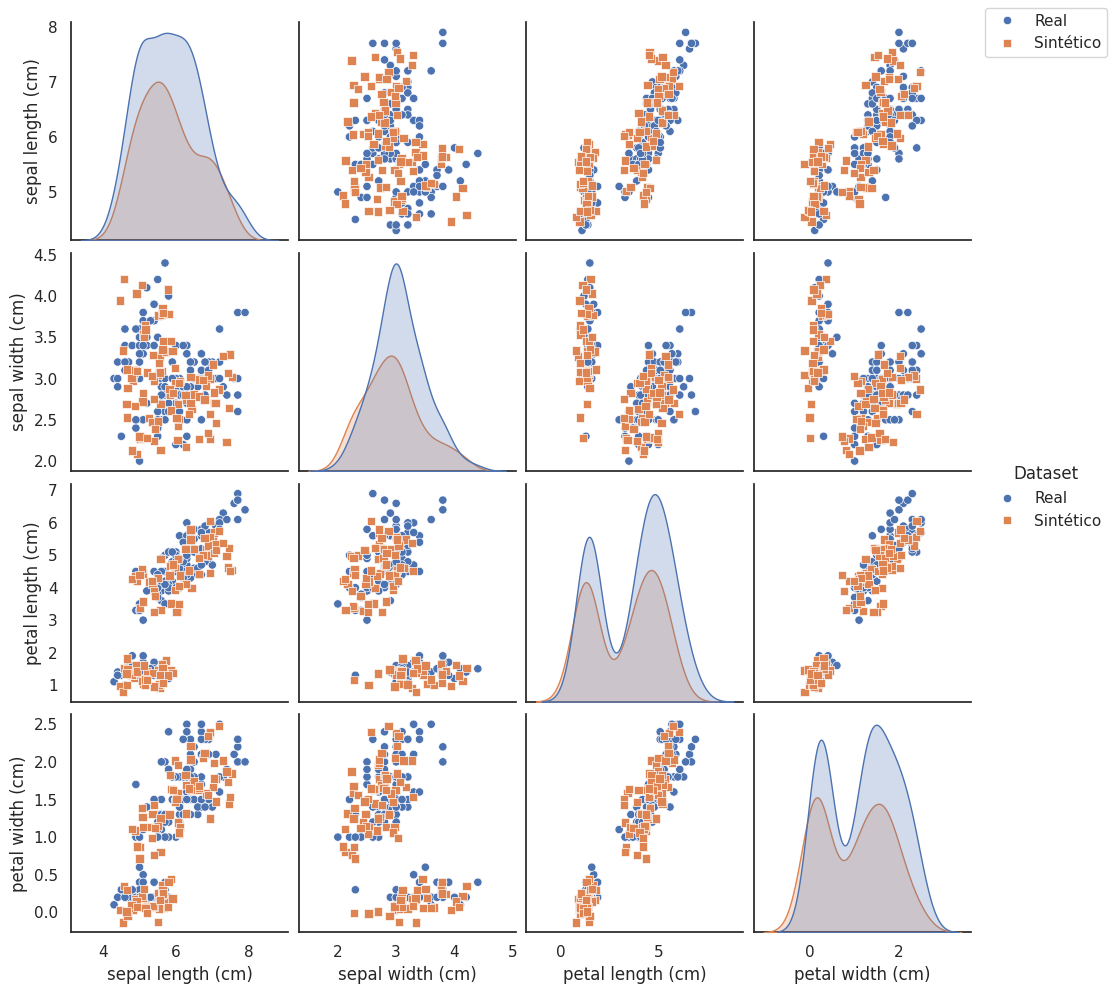

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer los dos archivos CSV (uno real y otro sintético)
data_real = pd.read_csv('iris_dataset.csv')
data_synth = pd.read_csv('datos_generados_otro.csv')

# Combinar ambos conjuntos de datos en un solo DataFrame para facilitar la visualización
data_real['Dataset'] = 'Real'
data_synth['Dataset'] = 'Sintético'
data_combined = pd.concat([data_real, data_synth])

# Configurar el estilo de Seaborn
sns.set_theme(style="white")

# Crear un gráfico de dispersión para comparar las distribuciones conjuntas
scatter_plot = sns.pairplot(data=data_combined, hue='Dataset', markers=['o', 's'], diag_kind='kde')

# Ajustar la leyenda
handles = scatter_plot._legend_data.values()
labels = scatter_plot._legend_data.keys()
scatter_plot.fig.legend(handles=handles, labels=labels, loc='upper right')

# Mostrar el gráfico
plt.show()

---
# Datos censales


In [72]:
from ctgan import load_demo

real_data = load_demo()

# Names of the columns that are discrete
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]

ctgan = CTGAN(epochs=50, verbose=True)
ctgan.fit(real_data, discrete_columns)



Gen. (-0.26) | Discrim. (-0.09): 100%|██████████| 50/50 [04:12<00:00,  5.06s/it]


In [84]:
# Create synthetic data
synthetic_data = ctgan.sample(1000)

In [85]:
real_data = load_demo()
real_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [73]:
synthetic_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,Private,95234,7th-8th,9,Separated,Protective-serv,Husband,Black,Male,-4,1,40,Trinadad&Tobago,<=50K
1,42,Private,156370,Some-college,10,Married-civ-spouse,Handlers-cleaners,Own-child,White,Male,-45,2,40,United-States,<=50K
2,52,Self-emp-inc,179936,HS-grad,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,14923,1,40,United-States,<=50K
3,32,State-gov,193985,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,-7,0,40,United-States,<=50K
4,24,Never-worked,40529,10th,6,Divorced,Tech-support,Unmarried,Black,Male,0,1,35,?,<=50K


In [79]:
real_data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [86]:
real_data['Dataset'] = 'Real'
synthetic_data['Dataset'] = 'Sintético'
combined_data = pd.concat([real_data, synthetic_data], ignore_index=True)
workclass_mapping = {' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2, ' Federal-gov':3, ' Local-gov':4, ' ?':5, ' Self-emp-inc': 6, ' Without-pay':7, ' Never-worked': 8}
combined_data['workclass'] = combined_data['workclass'].map(workclass_mapping)
sex_mapping = {' Male': 0, ' Female': 1}
combined_data['sex'] = combined_data['sex'].map(sex_mapping)
combined_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Dataset
0,39,0,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,<=50K,Real
1,50,1,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,<=50K,Real
2,38,2,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,<=50K,Real
3,53,2,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,<=50K,Real
4,28,2,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,<=50K,Real


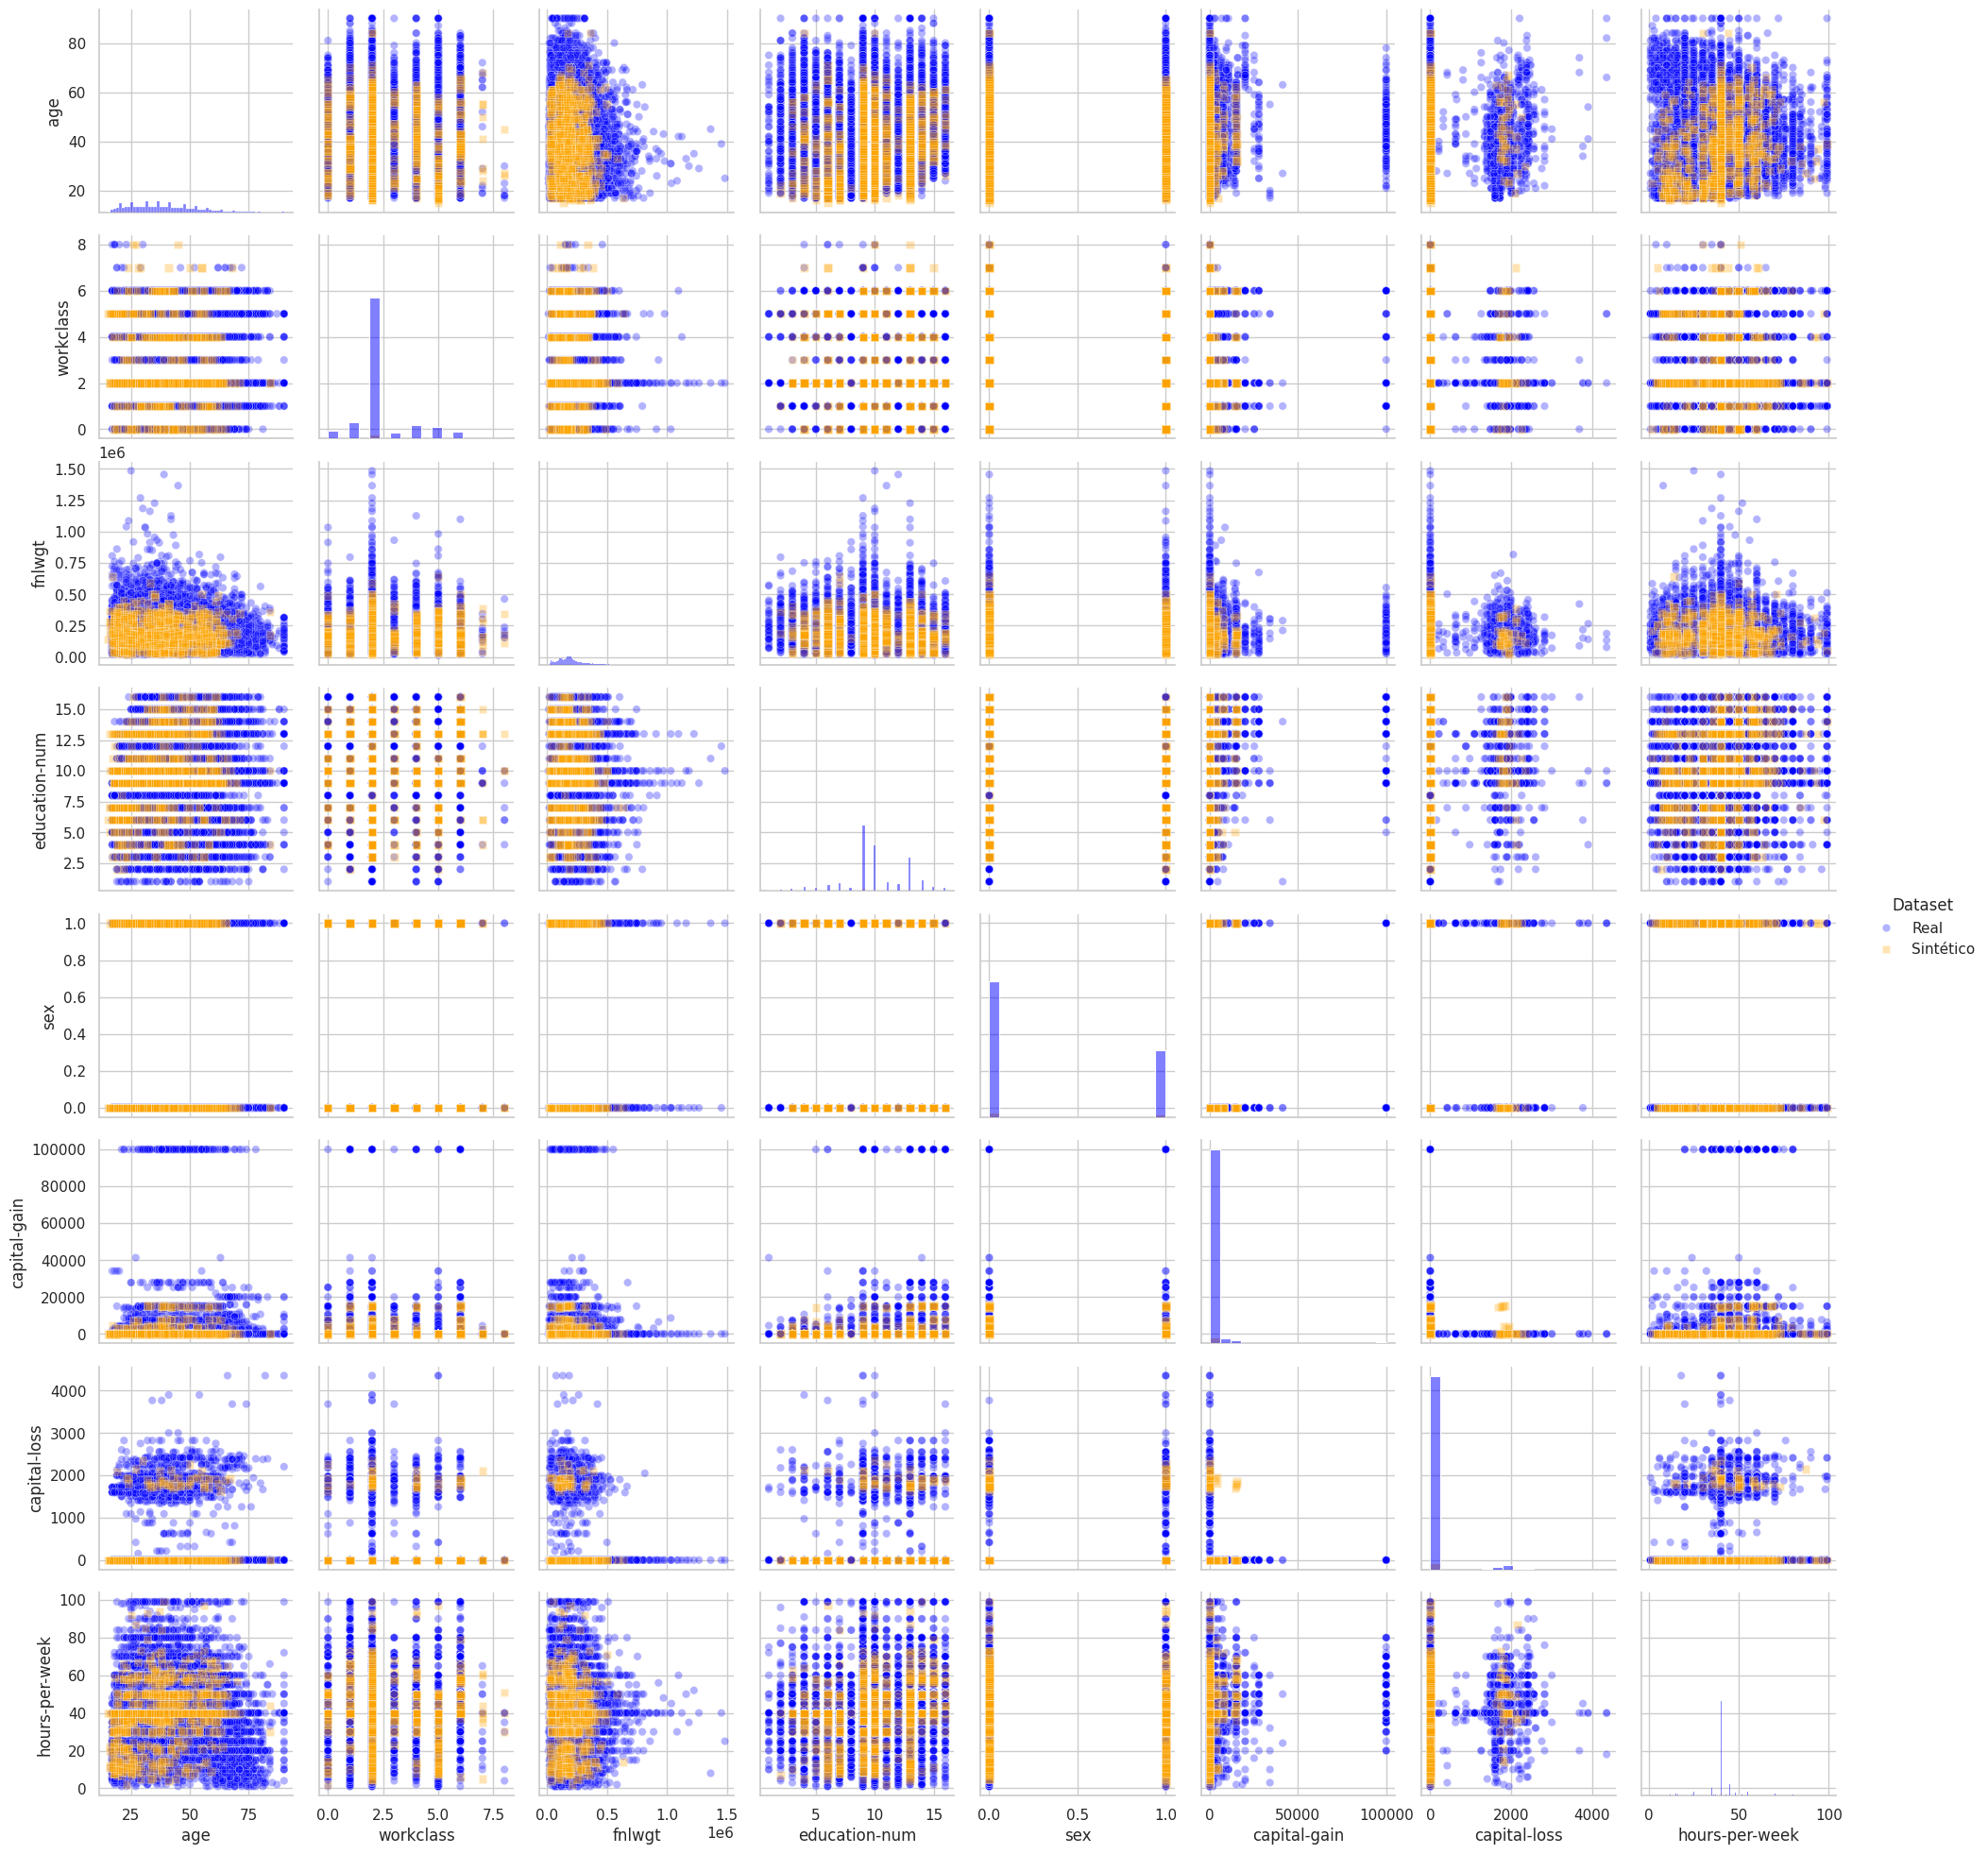

In [87]:
# Plot
sns.pairplot(combined_data, hue='Dataset', markers=['o', 's'], palette={'Real': 'blue', 'Sintético': 'orange'}, diag_kind='hist',
                plot_kws=dict(alpha= 0.3))
plt.show()

In [88]:
original_data = load_demo()
synthetic_data = ctgan.sample(1000)
original_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [89]:
from sdmetrics.single_column import KSComplement, TVComplement

for column in original_data.columns:
    valor = TVComplement.compute(
    real_data=original_data[column],
    synthetic_data=synthetic_data[column])
    print(f"Valor TV-Complement {column}: {valor}")

    valor = KSComplement.compute(
        real_data=original_data[column],
        synthetic_data=synthetic_data[column])
    print(f"Valor KS-Complement {column}: {valor}")

Valor TV-Complement age: 0.8308378428500452
Valor KS-Complement age: 0.9217972420994441
Valor TV-Complement workclass: 0.910448542735174
Valor KS-Complement workclass: 0.9666058781978439
Valor TV-Complement fnlwgt: 0.003470437970837792
Valor KS-Complement fnlwgt: 0.9413494057307823
Valor TV-Complement education: 0.8961188845551427
Valor KS-Complement education: 0.9202627683424957
Valor TV-Complement education-num: 0.8939291176560916
Valor KS-Complement education-num: 0.9343182641810756
Valor TV-Complement marital-status: 0.9386116826878781
Valor KS-Complement marital-status: 0.9459053161757932
Valor TV-Complement occupation: 0.8584572034028438
Valor KS-Complement occupation: 0.8705793433862596
Valor TV-Complement relationship: 0.8567622923128897
Valor KS-Complement relationship: 0.8567622923128897
Valor TV-Complement race: 0.7957264826018857
Valor KS-Complement race: 0.7957264826018857
Valor TV-Complement sex: 0.9762054912318419
Valor KS-Complement sex: 0.9762054912318417
Valor TV-Comp

---
# Métricas

In [1]:
from sdmetrics.reports.single_table import QualityReport
from sdmetrics import load_demo

real_data, synthetic_data, metadata = load_demo(modality='single_table')

my_report = QualityReport()
my_report.generate(real_data, synthetic_data, metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: :  43%|████▎     | 59/136 [00:00<00:00, 93.99it/s]

/home/javier/Documents/Master/RNAE/Trabajo_final/Codigo_trabajo/trabajo_RNAE/lib/python3.11/site-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:103: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_synthetic, _ = correlation_fn(synthetic_data[column1], synthetic_data[column2])


(2/2) Evaluating Column Pair Trends: : 100%|██████████| 136/136 [00:01<00:00, 90.91it/s]

Overall Score: 83.8%

Properties:
- Column Shapes: 85.11%
- Column Pair Trends: 82.5%


In [2]:
my_report.get_visualization(property_name='Column Pair Trends')